In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [92]:

# Read in the data
df = pd.read_csv('data/data2.csv')
# show the first 5 rows
df.head()

,Tipo,Bairro,Cidade,Vagas,Quartos,Area,Banheiros,Preco
0,Casa,São João,Curitiba,10,4,1340,10,1.300000e+09
1,Casa,Cacupé,Florianópolis,5,5,580,5,1.300000e+09
2,Casa,Alphaville Graciosa,Pinhais,6,4,585,1,7.950000e+08
3,Casa,Santa Felicidade,Curitiba,14,4,622,7,7.800000e+08
4,Apartamento,Ecoville,Curitiba,0,4,380,0,7.211303e+08


In [6]:
# generate descriptive statistics of price column
df.dtypes


Tipo          object
Bairro        object
Cidade        object
Vagas          int64
Quartos        int64
Area           int64
Banheiros      int64
Preco        float64
dtype: object

In [36]:
# Show the tree columns with the highest correlation with price
correlation_matrix = df.corr()


# Sort the correlations with "Preco" in descending order and exclude the "Preco" itself
top_correlations = correlation_matrix['Preco'].sort_values(ascending=False)[1:]

# Get the top three correlated columns
top_3_correlated = top_correlations.head(3)

print(top_3_correlated)



Quartos      0.369919
Banheiros    0.363010
Vagas        0.326278
Name: Preco, dtype: float64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_3124\1854479924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


C:\Users\Pablo\AppData\Local\Temp\ipykernel_3124\2625340915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Preco'])


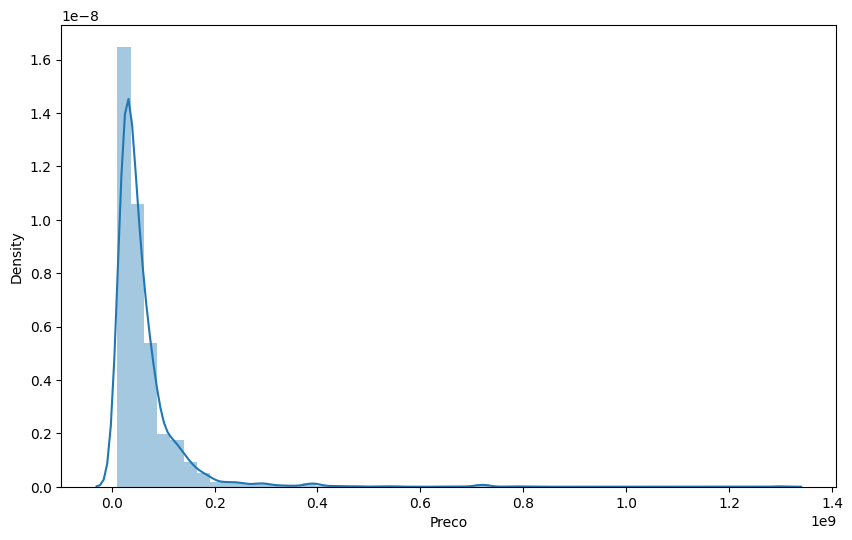

In [38]:
# Show the histogram of the prices
plt.figure(figsize=(10,6))
plt.tight_layout()
sns.distplot(df['Preco'])


plt.show()


In [96]:
df.describe()

,Vagas,Quartos,Area,Banheiros,Preco
count,4315.000000,4315.000000,4315.000000,4315.000000,4.314000e+03
mean,1.694786,2.756895,137.742758,1.857706,6.146267e+07
std,1.534115,0.943462,404.990598,1.163563,7.144207e+07
min,0.000000,0.000000,0.000000,0.000000,1.090000e+07
25%,1.000000,2.000000,65.000000,1.000000,2.699000e+07
50%,1.000000,3.000000,103.000000,2.000000,4.200000e+07
75%,2.000000,3.000000,160.000000,2.000000,6.999000e+07
max,24.000000,10.000000,24000.000000,10.000000,1.300000e+09


C:\Users\Pablo\AppData\Local\Temp\ipykernel_3124\125643205.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Tipo').mean()


<AxesSubplot: xlabel='Tipo', ylabel='Preco'>

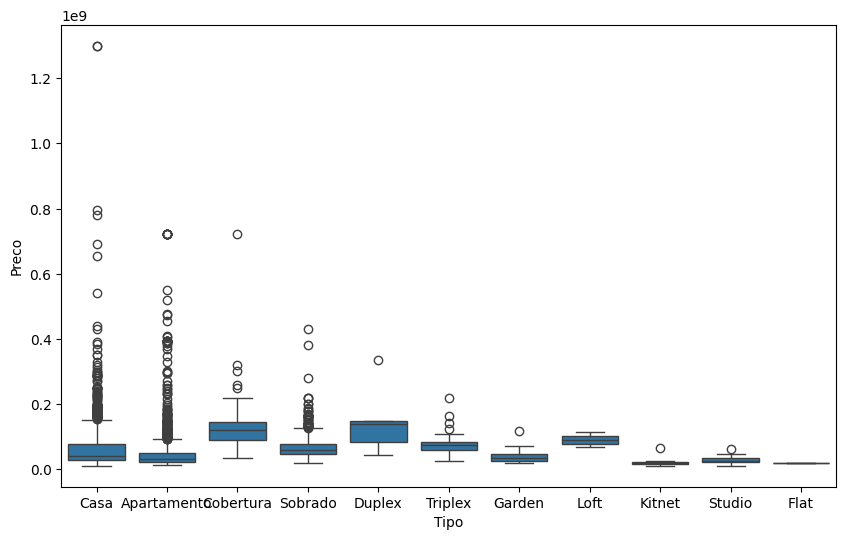

In [42]:
df['Tipo'].unique()
df.groupby('Tipo').mean()

# Show the boxplot of the prices by type
plt.figure(figsize=(10,6))
plt.tight_layout()
sns.boxplot(x='Tipo',y='Preco',data=df)



In [95]:
df.groupby('Cidade').count().reindex(['Preco'], axis=1).rename(columns={'Preco': 'Total'}).sort_values(by='Total', ascending=False).head(10)

,Total
Cidade,
Curitiba,2315
Pato Branco,292
Colombo,292
São José Dos Pinhais,211
Ponta Grossa,168
Pinhais,145
Campo Largo,119
Itapoá,119
Matinhos,117


In [94]:

df[df['Cidade'] == 'Curitiba'].groupby('Bairro').count().reindex(['Preco'], axis=1).rename(columns={'Preco': 'Total'}).sort_values(by='Total', ascending=False).head(10)

,Total
Bairro,
Centro,117
Água Verde,108
Santa Cândida,106
Uberaba,95
Cidade Industrial,95
Portão,83
Boqueirão,80
Boa Vista,72
Mossunguê,69
